#Overview

Accurate predictions of oil production rates can significantly enhance operational efficiency, reduce costs, and optimize resource management. With the increasing complexity of oil reservoirs and fluctuating market conditions, traditional forecasting methods may fall short in accuracy.

##Importance of Oil Forecasting
1. **Operational Efficiency**: Accurate forecasting allows companies to plan production schedules effectively, ensuring that resources are utilized optimally and downtime is minimized.

2. **Financial Planning**: Forecasting oil production is vital for budgeting and financial forecasting, as it directly impacts revenue projections and investment decisions.

3. **Risk Management**: Understanding production trends helps companies mitigate risks associated with fluctuating oil prices and unexpected operational challeges.

4. **Strategic Decision Making**: Forecasting provides insights into long-term trends, enabling companies in new technologies.

In this project, we examine historical production data of a well and leverage the LSTM-model to predict oil production rates.

#Data Preparation and Preprocessing

We commence this project by importing the relevant libraries, and loading the production data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Reservoir Characterization/Production Data.csv"

In [4]:
df1 = pd.read_csv(path)
df1.head(10)

,Date,Oil Rate (bbl/d)
0,2012-06-01,563.595565
1,2012-06-02,476.071842
2,2012-06-03,530.138070
3,2012-06-04,494.081713
4,2012-06-05,485.373217
5,2012-06-06,458.939727
6,2012-06-07,544.666768
7,2012-06-08,491.628112
8,2012-06-09,498.658889
9,2012-06-10,504.519845


In [5]:
df1.shape

(883, 2)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              883 non-null    object 
 1   Oil Rate (bbl/d)  883 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.9+ KB


**The data set is made of 883 rows and 2 columns. In addition there are two data types, objects and floats. Also, there are no missing values in the data set**

The plot below is a visual representation of the production data over time. The x-axis represents the date, and the y-axis represents the oil production rate.

You may observe a observe fluctuations in production rates, indicating periods of higher and lower production. Over the period of two years, you will also notice a declien in production, which appears normal due to pressure depletion from production over time.

Axes(0.125,0.11;0.775x0.77)


<Figure size 1200x800 with 0 Axes>

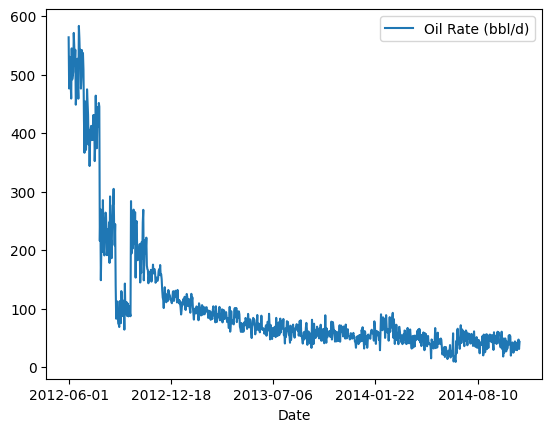

In [7]:
plt.figure(figsize = (12,8))
print(df1.plot(x= 'Date', y= 'Oil Rate (bbl/d)'))

**For the purpose of the project, the data set is split into training and testing sets.**

The first 715 data points are used for training and the remaining data points are used for testing.

In [8]:
df1_test = df1[715:]
df1_test

,Date,Oil Rate (bbl/d)
715,2014-05-17,42.766545
716,2014-05-18,42.915746
717,2014-05-19,66.628103
718,2014-05-20,32.390486
719,2014-05-21,56.875902
...,...,...
878,2014-10-27,37.245136
879,2014-10-28,39.071952
880,2014-10-29,46.931209
881,2014-10-30,30.826514


In [9]:
df1_test = df1_test.reset_index(drop=True)
df1_test

,Date,Oil Rate (bbl/d)
0,2014-05-17,42.766545
1,2014-05-18,42.915746
2,2014-05-19,66.628103
3,2014-05-20,32.390486
4,2014-05-21,56.875902
...,...,...
163,2014-10-27,37.245136
164,2014-10-28,39.071952
165,2014-10-29,46.931209
166,2014-10-30,30.826514


In [10]:
df1 = df1[:715]
df1

,Date,Oil Rate (bbl/d)
0,2012-06-01,563.595565
1,2012-06-02,476.071842
2,2012-06-03,530.138070
3,2012-06-04,494.081713
4,2012-06-05,485.373217
...,...,...
710,2014-05-12,47.124175
711,2014-05-13,44.288054
712,2014-05-14,34.054961
713,2014-05-15,33.416208


##Univariate Analysis and Data Scaling

Now we take the training data and visualize it in a histogram. From the plot, we observe that the data is right skewed, indicating a modal production rate close to 100 BOPD.

Also, you will observe that the histogram reveals a non-Gaussian distribution.

In [11]:
df1 = df1[['Oil Rate (bbl/d)']]
df1.head(2)

,Oil Rate (bbl/d)
0,563.595565
1,476.071842


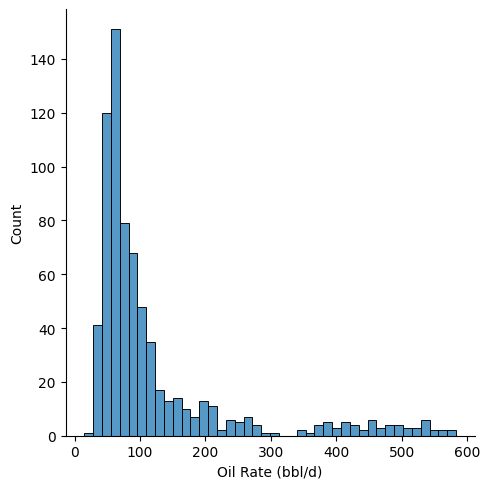

In [12]:
sns.displot(df1, x="Oil Rate (bbl/d)")

**Due to the non-Gaussian distribution, MinMaxScaler is applied to normalize the dataset. This will help improve the performance of the model.**

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
df1_scaled_train = sc.fit_transform(df1)
print(type(df1_scaled_train))
df1_scaled_train

<class 'numpy.ndarray'>


array([[0.96574343],
       [0.81170676],
       [0.90686018],
       [0.84340309],
       [0.82807664],
       [0.78155523],
       [0.93242985],
       [0.83908489],
       [0.85145865],
       [0.8617736 ],
       [0.97892169],
       [0.9369212 ],
       [0.88087125],
       [0.92824548],
       [0.76301523],
       [0.79309532],
       [0.88610781],
       [0.90124929],
       [0.82465756],
       [0.78116342],
       [1.        ],
       [0.96270796],
       [0.9054506 ],
       [0.92833394],
       [0.81148077],
       [0.84553284],
       [0.92710736],
       [0.89567892],
       [0.91831457],
       [0.86915359],
       [0.71495408],
       [0.61843051],
       [0.77314845],
       [0.62608621],
       [0.62796193],
       [0.67685725],
       [0.809218  ],
       [0.76698271],
       [0.73210968],
       [0.64284155],
       [0.68541303],
       [0.57853449],
       [0.66005197],
       [0.68998736],
       [0.69922598],
       [0.65643841],
       [0.6964484 ],
       [0.656

In [14]:
df1_scaled_train.shape[0]

715

The training data is then reshaped into sequences of 60 previous days' production rates, which will be used to run the prediction in the LSTM model.

In [15]:
from re import X
hops=60
total_len=df1_scaled_train.shape[0]
X_train=[]
y_train=[]
for i in range(60, total_len):
  X_train.append(df1_scaled_train[i-60:i])
  y_train.append(df1_scaled_train[i])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
print(y_train.shape)
print(X_train.shape)

(655, 1)
(655, 60, 1)


In [17]:
print(len(X_train))
print(len(y_train))

m1_len = X_train.shape[0]
m2_len = X_train.shape[1]

655
655


#Building and Training the LSTM Model

Having preprocessed our data set, we can now proceed to the next phase of the project. In this phase, we build the model using Keras.

The model consists of two layers, each having a dropout layer. We also apply Adam optimizer with a learning rate of 0.01.

The model is trained for up to 150 epochs with early stopping to prevent overfitting. Training and validation MAE are also monitored during this process.

In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [19]:
np.random.seed(seed=0)

In [20]:
model = Sequential()

# Layer 1
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.5))

# Layer 2
model.add(LSTM(units=40))
model.add(Dropout(0.2))

# Dense Layer
model.add(Dense(1))
opt = Adam(learning_rate=0.01, clipnorm=1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 40)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,401 (247.66 KB)

 Trainable params: 63,401 (247.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
epc = 150
es = EarlyStopping(monitor='val_loss', mode='min', patience=50)
history = model.fit(X_train, y_train, epochs=epc, batch_size=32, validation_split=0.2, callbacks=[es])

train_mae = history.history['mae']
valid_mae = history.history['val_mae']

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - loss: 0.0182 - mae: 0.1027 - val_loss: 4.9624e-04 - val_mae: 0.0173
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0030 - mae: 0.0376 - val_loss: 5.3497e-04 - val_mae: 0.0180
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0026 - mae: 0.0347 - val_loss: 8.0801e-04 - val_mae: 0.0237
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0020 - mae: 0.0306 - val_loss: 5.4594e-04 - val_mae: 0.0184
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0022 - mae: 0.0290 - val_loss: 8.2579e-04 - val_mae: 0.0240
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0031 - mae: 0.0368 - val_loss: 8.9820e-04 - val_mae: 0.0251
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0024 - mae: 0.0313 - val_loss: 0.0010 - val_mae: 0.0264
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0025 - mae: 0.0335 - val_loss: 8.1430e-04 - val_mae: 0.0231
Epoch 9/150
17/17 ━━━━━━━━

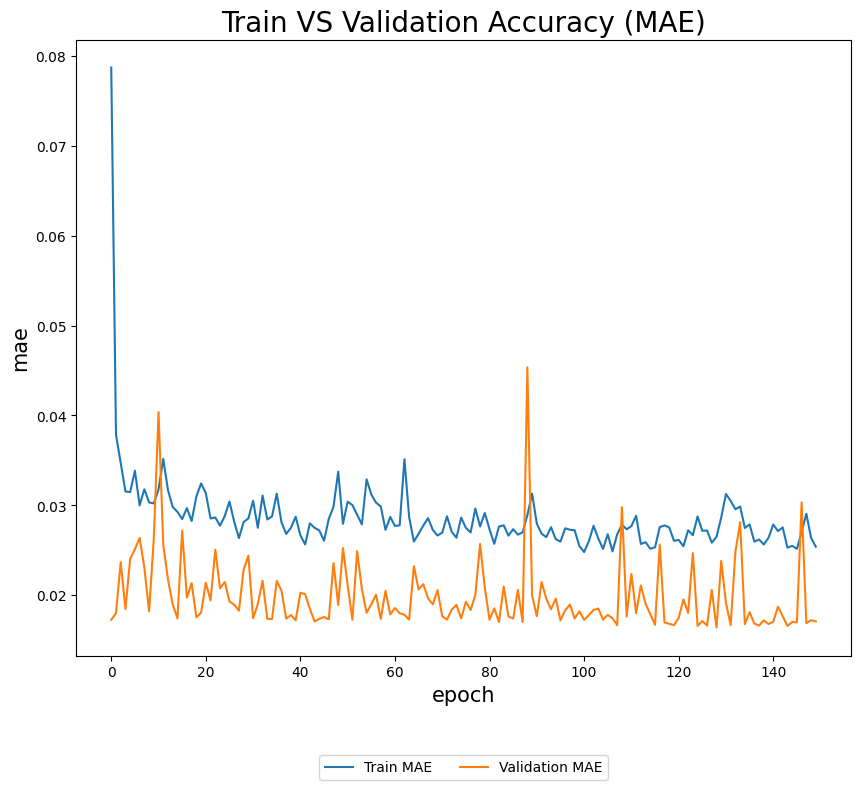

In [22]:
plt.figure(figsize=(10,8))
plt.plot(train_mae, label='Train MAE')
plt.plot(valid_mae, label='Validation MAE')
plt.ylabel('mae', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.title('Train VS Validation Accuracy (MAE)', fontsize=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15), fancybox=True, shadow=False, ncol=2)
plt.show()

#Testing and Forecasting

A similar process as in phase 2 is repeated but with the test data. The same scaling and sequence creating method is used for the trainig data.

The model is then used to predict oil production rates for the testing period.

The results are then visualized in a plot comparing the actual values from the test data. The performance of the model is evaluated and visualized by plotting actual vs predicted values. Then, MAE, MSE, RMSE and MAPE are calulated.

Axes(0.125,0.11;0.775x0.77)


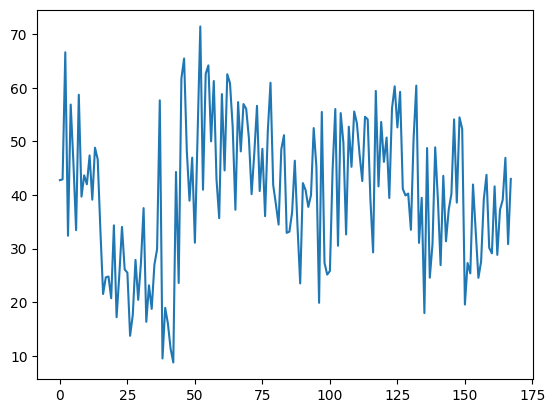

In [23]:
print(df1_test['Oil Rate (bbl/d)'].plot())

In [24]:
df1_total = pd.concat([df1['Oil Rate (bbl/d)'], df1_test['Oil Rate (bbl/d)']], axis=0)
df1_new = df1_total.values
df1_new

array([563.5955652 , 476.0718424 , 530.13807   , 494.0817128 ,
       485.3732174 , 458.9397268 , 544.6667684 , 491.6281119 ,
       498.6588893 , 504.5198453 , 571.0834598 , 547.2187532 ,
       515.3711424 , 542.2892066 , 448.4052869 , 465.4968081 ,
       518.34656   , 526.9499577 , 483.430491  , 458.7170973 ,
       583.0601645 , 561.8708065 , 529.337142  , 542.3394723 ,
       475.9434324 , 495.2918364 , 541.6425271 , 523.7848708 ,
       536.6464573 , 508.7131592 , 421.0969157 , 366.2521664 ,
       454.1629879 , 370.6021437 , 371.667926  , 399.4502731 ,
       474.6577269 , 450.6596121 , 430.8447343 , 380.1225363 ,
       404.3116736 , 343.5832261 , 389.9015048 , 406.9108132 ,
       412.1601972 , 387.8482815 , 410.5819797 , 388.1389872 ,
       430.36126   , 392.4385662 , 430.5137397 , 352.0041693 ,
       383.3399383 , 463.889435  , 410.278909  , 373.9030005 ,
       416.9908206 , 444.5008254 , 410.5705621 , 451.3577138 ,
       445.0954839 , 215.5616118 , 270.2095197 , 148.40

In [25]:
test_arr = df1_new[len(df1_new) - len(df1_test) - 60:]
len(test_arr)
test_arr.shape

(228,)

In [26]:
test_arr_1 = sc.transform(test_arr.reshape(-1, 1))
test_arr_1.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(228, 1)

In [27]:
n_hops = 60
n_features = 1
X_test = []

y_test = []
for i in range(n_hops, test_arr_1.shape[0]):
  X_test.append(test_arr_1[i-n_hops:i])
X_test = np.array(X_test)

In [28]:
X_test.shape

(168, 60, 1)

In [29]:
y_test

[]

In [30]:
y_test_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [31]:
y_test_pred[:, 0]

array([0.04724298, 0.04891233, 0.05203815, 0.06331293, 0.06175293,
       0.0642734 , 0.06468023, 0.05951408, 0.06286386, 0.06204738,
       0.06067044, 0.05914986, 0.05990392, 0.05842144, 0.05970322,
       0.06111945, 0.0573612 , 0.04929505, 0.04309759, 0.03955196,
       0.03672551, 0.03809592, 0.03641157, 0.0351962 , 0.03733973,
       0.03824832, 0.03778596, 0.03417669, 0.03115557, 0.03191163,
       0.03240754, 0.0336916 , 0.0380315 , 0.03681469, 0.03493236,
       0.03290294, 0.03325526, 0.0355324 , 0.04636784, 0.04316482,
       0.03751826, 0.03288336, 0.02898888, 0.02568969, 0.03135429,
       0.03536357, 0.047278  , 0.06292814, 0.06778115, 0.06397057,
       0.06196997, 0.05647337, 0.0579648 , 0.07028395, 0.07024472,
       0.07358767, 0.07883827, 0.07716484, 0.07820758, 0.07293444,
       0.06451547, 0.06601837, 0.06568124, 0.07091429, 0.07626425,
       0.07626516, 0.0686551 , 0.06845621, 0.06804067, 0.07058086,
       0.07310991, 0.07248155, 0.06703524, 0.06446818, 0.06734

In [32]:
print(len(y_test_pred))
y_test_pred

y_test_pred_actual = sc.inverse_transform(y_test_pred)
y_test_pred_actual

168


array([[41.7031  ],
       [42.651623],
       [44.427715],
       [50.834053],
       [49.94766 ],
       [51.37979 ],
       [51.61095 ],
       [48.675545],
       [50.57889 ],
       [50.114964],
       [49.332584],
       [48.468594],
       [48.89705 ],
       [48.054707],
       [48.783012],
       [49.587715],
       [47.45228 ],
       [42.869087],
       [39.347683],
       [37.333054],
       [35.727062],
       [36.505733],
       [35.548683],
       [34.858112],
       [36.076065],
       [36.592323],
       [36.329617],
       [34.278828],
       [32.56222 ],
       [32.991814],
       [33.27359 ],
       [34.003197],
       [36.46913 ],
       [35.777737],
       [34.7082  ],
       [33.55508 ],
       [33.75527 ],
       [35.04914 ],
       [41.20584 ],
       [39.385883],
       [36.17751 ],
       [33.543953],
       [31.33111 ],
       [29.456507],
       [32.675137],
       [34.95321 ],
       [41.722996],
       [50.615414],
       [53.3729  ],
       [51.207726],


In [33]:
test_pred_1 = pd.DataFrame(y_test_pred_actual, columns = ['actual'])
test_actual_1 = df1_test[['Date', 'Oil Rate (bbl/d)']]
full_test_actual_1 = pd.concat([test_pred_1, test_actual_1], axis=1)
full_test_actual_1

,actual,Date,Oil Rate (bbl/d)
0,41.703098,2014-05-17,42.766545
1,42.651623,2014-05-18,42.915746
2,44.427715,2014-05-19,66.628103
3,50.834053,2014-05-20,32.390486
4,49.947659,2014-05-21,56.875902
...,...,...,...
163,41.044102,2014-10-27,37.245136
164,41.303974,2014-10-28,39.071952
165,42.323246,2014-10-29,46.931209
166,44.779068,2014-10-30,30.826514


In [34]:
full_test_actual_1.to_csv('/content/drive/MyDrive/Reservoir Characterization/LSTM_results.csv')

In [35]:
full_test_actual_1.index = pd.to_datetime(full_test_actual_1['Date'])

In [36]:
df_LSTM = full_test_actual_1

In [37]:
df_LSTM

,actual,Date,Oil Rate (bbl/d)
Date,,,
2014-05-17,41.703098,2014-05-17,42.766545
2014-05-18,42.651623,2014-05-18,42.915746
2014-05-19,44.427715,2014-05-19,66.628103
2014-05-20,50.834053,2014-05-20,32.390486
2014-05-21,49.947659,2014-05-21,56.875902
...,...,...,...
2014-10-27,41.044102,2014-10-27,37.245136
2014-10-28,41.303974,2014-10-28,39.071952
2014-10-29,42.323246,2014-10-29,46.931209


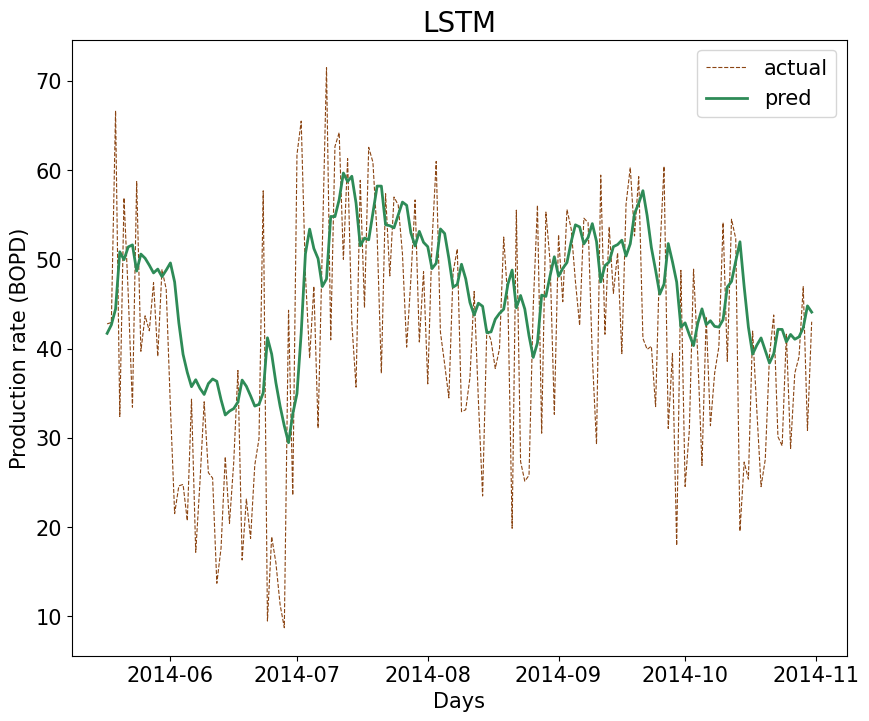

In [38]:
plt.figure(figsize=(10,8))
plt.plot(df_LSTM.index, df_LSTM['Oil Rate (bbl/d)'], color='saddlebrown', label='actual', linestyle='dashed', linewidth=0.8)
plt.plot(df_LSTM.index, df_LSTM['actual'], color='seagreen', label='pred', linestyle='solid', linewidth=2)
plt.ylabel('Production rate (BOPD)', fontsize=15)
plt.xlabel('Days', fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.title('LSTM', fontsize=20)
plt.show()

**The plot above demonstrates reasonable perfornmance. The predicted values generally follow the trend of the actual production data, capturing the overall pattern of production decline.**

**Another important observation from this plot is that the LSTM model tends to minimize the fluctuations in the oil production rate.**

In [39]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import math

print('MAE Validation: {}'.format(mean_absolute_error(full_test_actual_1['actual'], full_test_actual_1['Oil Rate (bbl/d)'])))
print('MSE Validation: {}'.format(mean_squared_error(full_test_actual_1['actual'], full_test_actual_1['Oil Rate (bbl/d)'])))
print('RMSE Validation: {}'.format(math.sqrt(mean_squared_error(full_test_actual_1['actual'], full_test_actual_1['Oil Rate (bbl/d)']))))
print('MAPE Validation: {}'.format(mean_absolute_percentage_error(full_test_actual_1['actual'], full_test_actual_1['Oil Rate (bbl/d)']) * 100))

MAE Validation: 10.511629609747372
MSE Validation: 165.3377844298862
RMSE Validation: 12.858374097446621
MAPE Validation: 23.62461085944091


#Conclusion

Based on the MAE, MSE, RMSE, and MAPE results, the LSTM model demonstrates good performance in predicting oil production rates. The relatively low values of these metrics indicate that the model's predictions are generally accurate and close to the actual values.

- The LSTM model demonstrates good performance in predicting oil production rates based on these metrics.

- MAE and RMSE values are relatively low, indicating good accuracy in absolute terms.
MAPE, while higher in percentage terms, is still within an acceptable range for oil production forecasting.

- The model's predictions generally align well with the actual values, capturing the overall production trend and fluctuations.

##Potential Improvements
- Further refining of the model's hyperparametes could potentiall improve its accuracy.

- Incorporating other relevant KPIs such as well characteristics, reservoir properties, could further enhanc the model's performance.
